In [1]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
import pydot
from tensorflow.keras.models import Model

In [2]:
def sequentialmodel():
    
    seq_model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    return seq_model

In [10]:
def model_with_function():
    
    input_layer = tf.keras.Input(shape=(28,28))
    
    flatten_layer= tf.keras.layers.Flatten()(input_layer)
    first_dense = tf.keras.layers.Dense(128, activation=tf.nn.relu)(flatten_layer)
    output_layer= tf.keras.layers.Dense(10, activation=tf.nn.softmax)(first_dense)
    
    func_model = Model(inputs=input_layer, outputs=output_layer)
    
    return func_model

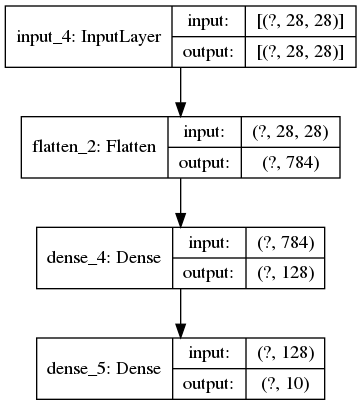

In [11]:
# model = sequentialmodel()
model = model_with_function()

plot_model(model, show_shapes=True, show_layer_names=True, to_file='model2.png')

In [13]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels)= mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [14]:
training_images = training_images/255.0
test_images = test_images/255.0

In [16]:
model.compile(optimizer = tf.optimizers.Adam(),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5039 - accuracy: 0.8222
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3799 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3404 - accuracy: 0.8768
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3153 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8901


In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3677 - accuracy: 0.8700


[0.3676913380622864, 0.8700000047683716]